# Kyeongho Min | KMin@scu.edu

# Midterm

<b>Penalties:</b> You will incur penalties if:
<ul>
<li>Your code is wrong</li>
<li>Your code would not work on different data</li>
<li>Your code is unnecessarily slow (you use a for loop, or you use DataFrame.apply unnecessarily, etc)
<li>You answer is composed of more than one output, unless explicitly permitted
</ul>

## Execute this code to read the data

In [1]:
import pandas as pd
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np

df = pd.read_csv('winemag-data-130k.csv',index_col=0)
#df['pizza_description'].fillna('',inplace=True)
#df['restaurant_zipcode'].fillna('',inplace=True)

In [2]:
print(df.shape)
df.head(20)

(129971, 13)


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [3]:
df.isna().any()

country                   True
description              False
designation               True
points                   False
price                     True
province                  True
region_1                  True
region_2                  True
taster_name               True
taster_twitter_handle     True
title                    False
variety                   True
winery                   False
dtype: bool

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


## Data Description

The data set contains information about wines--such as their region, price, country of origing--along with a description and review of each. <br/>
The data frame df has <b>a single row for each wine</b>.<br/> 

We will focus on just a few of the columns in this dataset, except for the initial questions about NA's.

#### Columns:
<ul>
<li><b>price</b>: price of wine, per bottle
<li><b>region</b>: region where wine is produced
<li><b>country</b>: country where win is produced
    <li><b>description</b>: description of wine (from reviewer)
<li><b>etc...
</ul>

### Question 1

How many missing values are there for each column?

In [6]:
df.isna().sum()

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

### Question 2

Show the percentage of values missing in each column to one decimal place, with the percentage symbol, ordered largest to smallest.

<br>
For example:
<br>
region_1 12.3%
<br>
region_2 1.1%
<br>
designation 2.3%
<br>
-- etc --

### Question 3

Which column is missing the most values? How many is it missing?

In [7]:
df.isna().sum().nlargest(1)

region_2    79460
dtype: int64

###### Question 4

How many wines are missing their prices?

In [8]:
df.price.isna().sum()

8996

### Question 5

Plot a histogram of wine prices, using 200 bins

In [11]:
df2 = df.copy()
df2['discretized_price'] = pd.cut(df2.price, 200)
df2['discretized_price'].unique()

[NaN, (0.704, 20.48], (53.44, 69.92], (20.48, 36.96], (36.96, 53.44], ..., (893.92, 910.4], (630.24, 646.72], (663.2, 679.68], (1487.2, 1503.68], (1124.64, 1141.12]]
Length: 65
Categories (64, interval[float64]): [(0.704, 20.48] < (20.48, 36.96] < (36.96, 53.44] < (53.44, 69.92] ... (1899.2, 1915.68] < (1998.08, 2014.56] < (2492.48, 2508.96] < (3283.52, 3300.0]]

TypeError: unorderable types: Interval() < float()

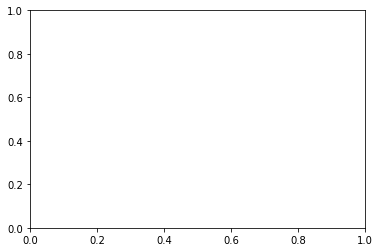

In [96]:
df2['discretized_price'].hist(bins = 200)

### Question 6

How many wines are from the province 'Douro'?

In [14]:
len(df[df.province == 'Douro'])

1281

### Question 7

What is the average price of wines from Duoro?

In [24]:
df[df.province == 'Douro'].price.mean()

29.141975308641975

### Question 8

What is the median price of wines from Duoro?

In [25]:
df[df.province == 'Douro'].price.median()

20.0

### Question 9

What is the most frequent wine price from Duoro?

In [34]:
df[df.province == 'Douro'].groupby('price').price.count().nlargest(1).index[0]

15.0

### Question 10

How many wines are there at that (most frequent) price from Duoro?

In [35]:
df[df.province == 'Douro'].groupby('price').price.count().nlargest(1).values[0]

101

### Question 11

Show the 7 most common prices of wines from (province) Oregon

In [49]:
df[df.province == 'Oregon'].groupby('price').price.count().nlargest(7).index[0:6]

Float64Index([20.0, 25.0, 50.0, 30.0, 28.0, 45.0], dtype='float64', name='price')

### Question 12

How many wines cost less than or equal to \$10?


How many pizzas cost more than \\$10 (\$10 excluded)?

In [50]:
len(df[df.price <= 10])

6280

In [51]:
len(df[df.price > 10])

114695

### Question 13

What percent of wines cost less than or equal to \$10 ?


What percent of wines cost more than \\$10 (\$10 excluded)?

Show your answers as a percentage, with the percent symbol, rounded to 1 decimal place.

Do not include wines where the price is missing in your calculations.

In [108]:
df_10 = df.copy()
df_10['price10'] = df_10.price.apply(lambda x: 1.0 if x <=10 else 0.0)
df_10.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,price10
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,0.0
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,0.0
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,0.0
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,0.0
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,0.0


Wine percentage price less than or equal to 10

In [109]:
print('{0:0.1f}%'.format(df_10.price10.mean()*100))

4.8%


Wine percentage price more than 10

In [110]:
print('{0:0.1f}%'.format(100 - df_10.price10.mean()*100))

95.2%


### Question 14

From which country is the most expensive bottle of wine?

In [69]:
df[df.price == df.price.max()].country.values[0]

'France'

### Question 15

Which wineries make bottles that sell  for $4 (exactly)?
<br>
(Do not show duplicate winery names.)

In [72]:
print(df[df.price == 4].winery.unique())

['Felix Solis' 'Dancing Coyote' 'Broke Ass' 'Bandit' "Pam's Cuties"
 'Terrenal' 'Cramele Recas']


### Question 16

Show these wineries (that make \\$4 bottles), and show how many $4 bottles each produces.

In [75]:
df[df.price == 4].groupby('winery').description.count()

winery
Bandit            3
Broke Ass         1
Cramele Recas     1
Dancing Coyote    1
Felix Solis       2
Pam's Cuties      1
Terrenal          2
Name: description, dtype: int64

### Question 17

Show all rows that have the phrase "tart and snappy" in the description. (note: ignore case)

In [77]:
df[df.description.apply(lambda s: True if 'tart and snappy' in s else False)]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
62846,US,"Lightweight and possessed of brisk acidity, th...",Dry,85,10.0,New York,Finger Lakes,Finger Lakes,Joe Czerwinski,@JoeCz,Lucas Vineyards 2001 Dry Riesling (Finger Lakes),Riesling,Lucas Vineyards


### Question 18

Find the price range of wines that use the word "leather" in their descriptions

In [79]:
df_leather = df[df.description.apply(lambda s: True if 'leather' in s else False)]
df_leather.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
18,Spain,"Desiccated blackberry, leather, charred wood a...",Vendimia Seleccionada Finca Valdelayegua Singl...,87,28.0,Northern Spain,Ribera del Duero,NaN,Michael Schachner,@wineschach,Pradorey 2010 Vendimia Seleccionada Finca Vald...,Tempranillo Blend,Pradorey
60,US,"Syrupy and dense, this wine is jammy in plum a...",Estate,86,100.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Okapi 2013 Estate Cabernet Sauvignon (Napa Val...,Cabernet Sauvignon,Okapi
72,Italy,"Aromas of black-skinned fruit, leather, underb...",Daginestra,86,32.0,Southern Italy,Aglianico del Vulture,NaN,Kerin O’Keefe,@kerinokeefe,Grifalco 2013 Daginestra (Aglianico del Vulture),Aglianico,Grifalco
87,US,"Softened tannins surround a light-bodied, lean...",Blau Vineyards,86,55.0,California,Knights Valley,Sonoma,Virginie Boone,@vboone,Passaggio 2014 Blau Vineyards Merlot (Knights ...,Merlot,Passaggio
92,US,All red Bordeaux varieties are represented in ...,Magnificat,88,55.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Franciscan 2013 Magnificat Meritage (Napa Valley),Meritage,Franciscan


In [98]:
df_leather.shape

(6022, 14)

In [92]:
df_leather.price.nlargest(1).values[0] # largest

780.0

In [93]:
df_leather.price.nsmallest(1).values[0] # smallest

6.0

### Question 19

Show a histogram of prices for  wines that use the word "leather" in the description. 
<br>
Use a step size of 10. (That is, the bins should be in incriments of 10.)

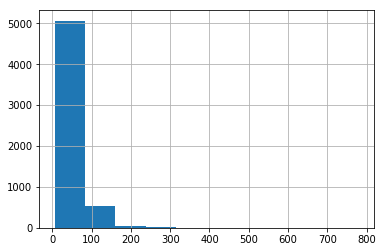

In [117]:
df_leather.price.hist(bins = 10)

### Question 20

Show the number of wines per country that have the word "savory" in their descriptions.

In [119]:
df_savory = df[df.description.apply(lambda s: True if 'savory' in s else False)]
df_savory.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
50,Italy,This blend of Nero d'Avola and Syrah opens wit...,Scialo,86,NaN,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,Viticultori Associati Canicatti 2008 Scialo Re...,Red Blend,Viticultori Associati Canicatti
76,Germany,Earthy pollen and mineral notes lend a savory ...,NaN,86,9.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Schmitt Söhne 2015 Riesling (Rheinhessen),Riesling,Schmitt Söhne
97,US,A wisp of bramble extends a savory tone from n...,Ingle Vineyard,88,20.0,New York,Finger Lakes,Finger Lakes,Anna Lee C. Iijima,NaN,Heron Hill 2015 Ingle Vineyard Riesling (Finge...,Riesling,Heron Hill
99,US,This blends 20% each of all five red-Bordeaux ...,Intreccio Library Selection,88,75.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Soquel Vineyards 2013 Intreccio Library Select...,Bordeaux-style Red Blend,Soquel Vineyards


In [128]:
df_savory.groupby('country').description.size()

country
Argentina          136
Australia          165
Austria            170
Bulgaria             5
Canada               2
Chile              105
China                1
Croatia              1
Cyprus               1
Czech Republic       3
France             110
Georgia             10
Germany            194
Greece              22
Hungary              2
India                1
Israel              38
Italy             1112
Lebanon              4
Mexico               3
Morocco              4
New Zealand         75
Romania              1
Slovenia            13
South Africa        52
Spain              215
Turkey               9
US                2321
Uruguay             10
Name: description, dtype: int64

### Question 21

Now show this as a percentage of wines from each country, for the countries with the 20 largest percentages.

In [148]:
df_savory_per = df_savory.groupby('country').description.size()

country
Argentina          136
Australia          165
Austria            170
Bulgaria             5
Canada               2
Chile              105
China                1
Croatia              1
Cyprus               1
Czech Republic       3
France             110
Georgia             10
Germany            194
Greece              22
Hungary              2
India                1
Israel              38
Italy             1112
Lebanon              4
Mexico               3
Morocco              4
New Zealand         75
Romania              1
Slovenia            13
South Africa        52
Spain              215
Turkey               9
US                2321
Uruguay             10
Name: description, dtype: int64

### Question 22

Now show the same result but for countries with the 10 smallest percentages of wines that use "savory" in the description. Do not include countries that do not have any wines described as "savory." Show in descending order.

China stands out in this result, with a particularly high percentage. Show and explain why this is the case. (Make sure to show any relevant descriptions in full in your answer.)

### Question EC

For wines costing >= $100...

1. Which province has the highest average wine price? 
2. Show the top 3 privinces and their average prices. 
3. Show how many wines are in each of those 3 most expensive wineries, next to their average prices.

In [212]:
# part 1
df_pp_avg

In [213]:

# part 2


In [214]:

# part 3
